<a href="https://colab.research.google.com/github/Dennis-Kiarie/Mchezopesa-Ltd-Footbal-Game-Prediction/blob/main/Moringa_Data_Science_Core_W6_Independent_Project_2021_Dennis_Kiarie_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **Defining the question**

a) **Specifying the question**

To design a model that will predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly while stating ranking of the team.

b)**Defining Metric of success**

The project will be considered a success if the models created are able to predict results of a game to an accuracy between 70-80%

c)**Understanding the context**

The men's FIFA World Ranking is a ranking system for men's national teams in association football, currently led by Belgium.
The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992

**How is ranking calculated**

The calculation used is the number of points the team has at the end of the year (z) multiplied by the number of points it earned during the year (y). The team with the highest index on this calculation received the award.

d) **Recording Experimental Design**

In this study, we will be conducting Explorative Data Analysis, i.e Univariate, Bivariate and Multivariate Analysis to get the relationships and differences between different variables. We will also create models using polynomial regression and logistic regression.


e)**Data Relevance**

We will be using data extracted from two undermentioned datasets i.e

1.   Fifa_ranking.csv;
It shows Fifa teams monthly ranking and point from 1993 to 2018
2.   Results.csv;
It shows International Soccer matches from 1872 to 2019 teams

#2.Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#3.Read the data

In [2]:
#load the data from Fifa ranking dataset
ranking = pd.read_csv('/content/fifa_ranking.csv', sep=',\s+', delimiter=',', encoding="utf-8", skipinitialspace=True)

#preview the data
ranking

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [3]:
#load the data from result dataset
result = pd.read_csv('/content/results.csv', sep=',\s+', delimiter=',', encoding="utf-8", skipinitialspace=True)

#preview the data
result

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


# 4.Checking the data

In [4]:
#Determine the number of Records in our dataset
#
print("The rows and columns for the ranking dataset: ", ranking.shape)
print("The rows and columns for the results dataset: ", result.shape)

The rows and columns for the ranking dataset:  (57793, 16)
The rows and columns for the results dataset:  (40839, 9)


In [5]:
# Checking whether each column has an appropriate datatype
#
print("Datatypes for ranking dataset: ")
print(ranking.dtypes)
print("*****************")
print("Datatypes for results dataset: ")
print(result.dtypes)

Datatypes for ranking dataset: 
rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object
*****************
Datatypes for results dataset: 
date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object


In [6]:
#Previewing the top of ranking dataset
#
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [7]:
#previewing the bottom of ranking dataset
ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [8]:
#previewing the top of result datasets
result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [9]:
#previewing the bottom of result datasets
result.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


#5.External Data Source Validation

#6.Tidying the datasets

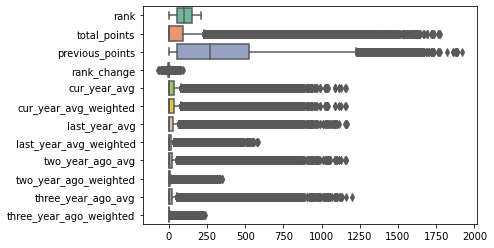

In [10]:
#checking for outliers in the ranking dataset
ax = sns.boxplot(data=ranking, orient="h", palette="Set2")


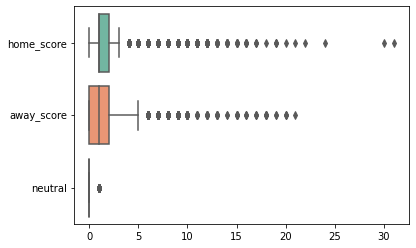

In [11]:
#checking for outliers in result dataset
ax = sns.boxplot(data=result, orient="h", palette="Set2")

In [12]:
#checking for anomalies

#Checking outliers

# quantiles
Q1 = ranking.quantile(0.25)
Q3 = ranking.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
# 
df_ranking= ranking[~((ranking < (Q1 - 1.5 * IQR)) | (ranking > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# 
print(df_ranking.shape)

# Printing the shape of our old dataset
#
print(ranking.shape)


(36577, 16)
(57793, 16)


In [13]:
#checking for anomalies

#Checking outliers

# quantiles
Q1 = result.quantile(0.25)
Q3 = result.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
# 
df_result= result[~((result< (Q1 - 1.5 * IQR)) | (result> (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# 
print(df_result.shape)

# Printing the shape of our old dataset
#
print(result.shape)

(26433, 9)
(40839, 9)


In [14]:
# we change the columns containing dates from the datatype object to datetime in ranking dataset
#
ranking['rank_date'] = pd.to_datetime(ranking['rank_date'])

#preview date column
ranking['rank_date']

0       1993-08-08
1       1993-08-08
2       1993-08-08
3       1993-08-08
4       1993-08-08
           ...    
57788   2018-06-07
57789   2018-06-07
57790   2018-06-07
57791   2018-06-07
57792   2018-06-07
Name: rank_date, Length: 57793, dtype: datetime64[ns]

In [15]:
#we change the columns containing dates from the datatype object to datetime in ranking dataset
#
result['date'] = pd.to_datetime(result['date'])

#preview date column
result['date']

0       1872-11-30
1       1873-03-08
2       1874-03-07
3       1875-03-06
4       1876-03-04
           ...    
40834   2019-07-18
40835   2019-07-18
40836   2019-07-19
40837   2019-07-19
40838   2019-07-20
Name: date, Length: 40839, dtype: datetime64[ns]

Since the Ranking points on the Fifa started from 21/09/2011, we will now use data from this date onwards for our analysis.

In [16]:
ranking = ranking[ranking['rank_date'] > '2011-08-24']
results = result[result['date'] > '2011-08-24']
print("Shape of ranking: ", ranking.shape)
print("Shape of results: ", result.shape)

Shape of ranking:  (17208, 16)
Shape of results:  (40839, 9)


In [17]:
#we change the columns containing dates to year in ranking dataset
import datetime
ranking['year'] = ranking['rank_date'].dt.year
ranking.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07,2018
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07,2018
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07,2018
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07,2018
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,2018


In [18]:
#we change the column containing dates to year in result dataset
results['year'] = results['date'].dt.year
results.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
33281,2011-08-25,United Arab Emirates,Qatar,3,1,Friendly,al-Ain,United Arab Emirates,False,2011
33282,2011-08-26,Bahrain,Sudan,1,0,Friendly,Riffa,Bahrain,False,2011
33283,2011-08-27,Angola,DR Congo,1,2,Friendly,Dundo,Angola,False,2011
33284,2011-08-27,Fiji,Tahiti,3,0,Pacific Games,Boulari,New Caledonia,True,2011
33285,2011-08-27,Jordan,Indonesia,1,0,Friendly,Amman,Jordan,False,2011


The rankings runs from the year 2011 to the year 2018  whereas the results runs to the year 2019. For data balance we will remove data for the year 2019 in the results.

In [19]:
#Standardizing the dataset
results_df = results[results['year'] < 2019]
results_df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
40346,2018-12-30,Yemen,Syria,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,2018
40347,2018-12-31,South Korea,Saudi Arabia,0,0,Friendly,Abu Dhabi,United Arab Emirates,True,2018
40348,2018-12-31,Kyrgyzstan,Palestine,2,1,Friendly,Doha,Qatar,True,2018
40349,2018-12-31,Philippines,Vietnam,2,4,Friendly,Doha,Qatar,True,2018
40350,2018-12-31,Qatar,Iran,1,2,Friendly,Doha,Qatar,False,2018



To carry on with the dataset cleaning and further move to feature engineering, it is very crucial for us to determine which variables will be necessary for our analysis and also classify which variables will be used as features and which will be the target.

Target: Since we are creating a model that can predict results of a football match, result will be our target

Features: The following will be the features used in the model to predict the results; rank, country, weighted_points, year, home_team, away_team, home_score, away_score tournament

In [20]:
#Drop unnecessary columns
ranking = ranking.drop(columns=['country_abrv', 'total_points','previous_points', 
                               'rank_change', 'cur_year_avg','last_year_avg', 'last_year_avg_weighted',
                               'two_year_ago_avg','three_year_ago_avg','confederation'])

In [21]:
# preview the columns
ranking.columns

Index(['rank', 'country_full', 'cur_year_avg_weighted',
       'two_year_ago_weighted', 'three_year_ago_weighted', 'rank_date',
       'year'],
      dtype='object')

In [22]:
#Calculating the  sum of the weighted points
ranking['weighted_points'] =  ranking['cur_year_avg_weighted'] + ranking['two_year_ago_weighted'] + ranking['three_year_ago_weighted']
ranking.head()

,rank,country_full,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,rank_date,year,weighted_points
40585,1,Spain,656.13,237.69,207.45,2011-09-21,2011,1101.27
40586,2,Netherlands,727.05,239.62,122.57,2011-09-21,2011,1089.24
40587,3,Germany,557.21,148.20,123.85,2011-09-21,2011,829.26
40588,4,Uruguay,589.71,111.01,91.07,2011-09-21,2011,791.79
40589,5,Portugal,638.67,125.09,98.40,2011-09-21,2011,862.16


In [23]:
#Drop unnecessary columns in ranking dataset
ranking_df= ranking.drop(columns=['cur_year_avg_weighted','two_year_ago_weighted','three_year_ago_weighted'])

#preview the ranking dataset
ranking_df.head()

,rank,country_full,rank_date,year,weighted_points
40585,1,Spain,2011-09-21,2011,1101.27
40586,2,Netherlands,2011-09-21,2011,1089.24
40587,3,Germany,2011-09-21,2011,829.26
40588,4,Uruguay,2011-09-21,2011,791.79
40589,5,Portugal,2011-09-21,2011,862.16


In [24]:
#Dropping columns for results dataset
#
results_df = results.drop(columns=['date','city','neutral'])

#preview the result dataset
results_df.tail()

,home_team,away_team,home_score,away_score,tournament,country,year
40834,American Samoa,Tahiti,8,1,Pacific Games,Samoa,2019
40835,Fiji,Solomon Islands,4,4,Pacific Games,Samoa,2019
40836,Senegal,Algeria,0,1,African Cup of Nations,Egypt,2019
40837,Tajikistan,North Korea,0,1,Intercontinental Cup,India,2019
40838,Papua New Guinea,Fiji,1,1,Pacific Games,Samoa,2019


In [25]:
#check for duplicates in ranking dataset
ranking.duplicated().sum()

37

In [26]:
#check for duplicates in result datasets
result.duplicated().sum()

0

In [27]:
#Dealing with duplicates
ranking.drop_duplicates(keep=False,inplace=True)

In [28]:
# Check for unique values in each column of ranking dataset
for col in ranking.columns.to_list():
  print(f'{col} column unique values: \n')
  print(ranking[col].unique(), end='\n')
  print('**********')
  print('\n')

rank column unique values: 

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  29  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  55  56  57
  58  59  60  61  62  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  97  99 100 101 102 103 105 106 107 108 109 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 141 143 144 145 146 147 149 150 151 152 154 155 156
 158 160 161 162 163 166 168 169 170 172 173 174 176 177 178 182 183 184
 185 186 187 188 189 190 191 193 195 196 197 198 200 201 203  28  54  63
  96  98 104 110 140 148 164 165 167 171 175 179 180 181 192 194 199  30
 142 153 157 159 202 204 205 206 207 208 209]
**********


country_full column unique values: 

['Spain' 'Netherlands' 'Germany' 'Uruguay' 'Portugal' 'Italy' 'Brazil'
 

In [29]:
# Check for unique values in each column of results datasets
for col in result.columns.to_list():
  print(f'{col} column unique values: \n')
  print(result[col].unique(), end='\n')
  print('**********')
  print('\n')

date column unique values: 

['1872-11-30T00:00:00.000000000' '1873-03-08T00:00:00.000000000'
 '1874-03-07T00:00:00.000000000' ... '2019-07-18T00:00:00.000000000'
 '2019-07-19T00:00:00.000000000' '2019-07-20T00:00:00.000000000']
**********


home_team column unique values: 

['Scotland' 'England' 'Wales' 'Northern Ireland' 'United States' 'Uruguay'
 'Austria' 'Hungary' 'Argentina' 'Belgium' 'France' 'Netherlands'
 'Czechoslovakia' 'Switzerland' 'Sweden' 'Germany' 'Italy' 'Chile'
 'Norway' 'Finland' 'Luxembourg' 'Russia' 'Denmark' 'Catalonia'
 'Basque Country' 'Brazil' 'Japan' 'Paraguay' 'Canada' 'Estonia'
 'Costa Rica' 'Guatemala' 'Spain' 'Brittany' 'Poland' 'Yugoslavia'
 'New Zealand' 'Romania' 'Latvia' 'Galicia' 'Portugal' 'Andalusia'
 'China PR' 'Australia' 'Lithuania' 'Turkey' 'Central Spain' 'Mexico'
 'Aruba' 'Egypt' 'Haiti' 'Philippines' 'Bulgaria' 'Jamaica' 'Kenya'
 'Bolivia' 'Peru' 'Honduras' 'Guyana' 'Uganda' 'Belarus' 'El Salvador'
 'Barbados' 'Republic of Ireland' 'Trinidad 

In [30]:
#Checking for null values in ranking dataset
ranking.isnull().sum()

rank                       0
country_full               0
cur_year_avg_weighted      0
two_year_ago_weighted      0
three_year_ago_weighted    0
rank_date                  0
year                       0
weighted_points            0
dtype: int64

In [31]:
#checking for null values in result dataset
result.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [32]:
# More data cleaning procedures
#check for info in ranking dataset
df_ranking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36577 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     36577 non-null  int64  
 1   country_full             36577 non-null  object 
 2   country_abrv             36577 non-null  object 
 3   total_points             36577 non-null  float64
 4   previous_points          36577 non-null  int64  
 5   rank_change              36577 non-null  int64  
 6   cur_year_avg             36577 non-null  float64
 7   cur_year_avg_weighted    36577 non-null  float64
 8   last_year_avg            36577 non-null  float64
 9   last_year_avg_weighted   36577 non-null  float64
 10  two_year_ago_avg         36577 non-null  float64
 11  two_year_ago_weighted    36577 non-null  float64
 12  three_year_ago_avg       36577 non-null  float64
 13  three_year_ago_weighted  36577 non-null  float64
 14  confederation         

In [33]:
# check for info in result dataset
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26433 entries, 0 to 40829
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        26433 non-null  object
 1   home_team   26433 non-null  object
 2   away_team   26433 non-null  object
 3   home_score  26433 non-null  int64 
 4   away_score  26433 non-null  int64 
 5   tournament  26433 non-null  object
 6   city        26433 non-null  object
 7   country     26433 non-null  object
 8   neutral     26433 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 1.8+ MB


In [34]:
#we merged the two datasets
merged_df = results_df.merge(ranking_df, left_on=['home_team', 'year'], right_on=['country_full', 'year'], how='inner')
merged_df= merged_df.merge(ranking_df, left_on=['away_team', 'year'], right_on=['country_full', 'year'], how='inner')
merged_df.drop(['country', 'year', 'country_full_x', 'country_full_y'], axis=1, inplace=True)
merged_df.head()

,home_team,away_team,home_score,away_score,tournament,rank_x,rank_date_x,weighted_points_x,rank_y,rank_date_y,weighted_points_y
0,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,100,2011-09-21,291.93
1,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,92,2011-10-19,305.53
2,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,95,2011-11-23,333.73
3,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,93,2011-12-21,314.79
4,United Arab Emirates,Qatar,3,1,Friendly,113,2011-10-19,169.00,100,2011-09-21,291.93


In [35]:
#we preview the shape of all datasets
print("Shape of merged_df: ", merged_df.shape)
print("Shape of ranking: ", ranking.shape)
print("Shape of results: ", result.shape)

Shape of merged_df:  (690264, 11)
Shape of ranking:  (17134, 8)
Shape of results:  (40839, 9)


In [36]:
#Changing column names
merged_df.rename(columns={'rank_x':'home_team_rank',
                     'rank_y':'away_team_rank',
                     'rank_date_x':'home_team_date',
                     'rank_date_y':'away_team_date',
                     'weighted_points_x':'home_team_weighted_points',
                     'weighted_points_y':'away_team_weighted_points'}, 
                 inplace=True)
 
merged_df.head()

,home_team,away_team,home_score,away_score,tournament,home_team_rank,home_team_date,home_team_weighted_points,away_team_rank,away_team_date,away_team_weighted_points
0,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,100,2011-09-21,291.93
1,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,92,2011-10-19,305.53
2,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,95,2011-11-23,333.73
3,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,93,2011-12-21,314.79
4,United Arab Emirates,Qatar,3,1,Friendly,113,2011-10-19,169.00,100,2011-09-21,291.93


In [37]:
#more data cleaning
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690264 entries, 0 to 690263
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   home_team                  690264 non-null  object        
 1   away_team                  690264 non-null  object        
 2   home_score                 690264 non-null  int64         
 3   away_score                 690264 non-null  int64         
 4   tournament                 690264 non-null  object        
 5   home_team_rank             690264 non-null  int64         
 6   home_team_date             690264 non-null  datetime64[ns]
 7   home_team_weighted_points  690264 non-null  float64       
 8   away_team_rank             690264 non-null  int64         
 9   away_team_date             690264 non-null  datetime64[ns]
 10  away_team_weighted_points  690264 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(3

In [38]:
#convert column names to uppercase
merged_df.columns = merged_df.columns.str.upper()

#preview the columns
merged_df.columns

Index(['HOME_TEAM', 'AWAY_TEAM', 'HOME_SCORE', 'AWAY_SCORE', 'TOURNAMENT',
       'HOME_TEAM_RANK', 'HOME_TEAM_DATE', 'HOME_TEAM_WEIGHTED_POINTS',
       'AWAY_TEAM_RANK', 'AWAY_TEAM_DATE', 'AWAY_TEAM_WEIGHTED_POINTS'],
      dtype='object')

Our merged fifa  dataset has no null values, outliers, duplicates and the datatypes are also appropriate hence no more data cleaning required, we therefore move to Exploratory Data Analysis

# 7. Exploratory Data Analysis

a. **Univariate Analysis**

In [39]:
#get proprotion of home team
merged_df['HOME_TEAM'].value_counts(normalize=True)*100

Qatar             1.206495
Mexico            1.180418
Japan             1.157238
South Africa      1.134059
Zambia            1.123628
                    ...   
American Samoa    0.032451
Cook Islands      0.023180
Myanmar           0.015646
Timor-Leste       0.010431
Cayman Islands    0.006954
Name: HOME_TEAM, Length: 193, dtype: float64

In [40]:
#get proprotion of away team
merged_df['AWAY_TEAM'].value_counts(normalize=True)*100

Sudan             1.128843
Zambia            1.010628
Uganda            1.005992
Burkina Faso      0.953838
Ghana             0.938771
                    ...   
Anguilla          0.041723
Cayman Islands    0.027815
Myanmar           0.020862
Bahamas           0.020862
Timor-Leste       0.015646
Name: AWAY_TEAM, Length: 195, dtype: float64

In [41]:
#get proprtion of TOURNAMENT
merged_df['TOURNAMENT'].value_counts(normalize=True)*100

Friendly                                36.627146
FIFA World Cup qualification            25.344506
African Cup of Nations qualification     5.981480
UEFA Euro qualification                  5.391560
African Nations Championship             3.405653
AFC Asian Cup qualification              2.362574
African Cup of Nations                   1.981850
CECAFA Cup                               1.874645
UEFA Euro                                1.710650
COSAFA Cup                               1.554188
FIFA World Cup                           1.366434
AFF Championship                         1.095233
Copa América                             1.084802
Gold Cup                                 1.043079
CFU Caribbean Cup qualification          0.917910
UEFA Nations League                      0.688432
Confederations Cup                       0.667571
Gulf Cup                                 0.646709
Oceania Nations Cup                      0.646709
SAFF Cup                                 0.639755


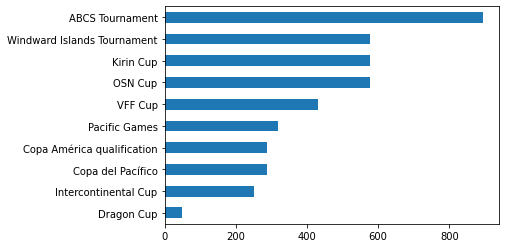

In [42]:
#Checking tournament type value counts
merged_df.TOURNAMENT.value_counts().sort_values().head(10).plot(kind = 'barh')
#The tournament type ABCS recorded the highest number of matches

In [43]:
#Describe numerical variables 
merged_df.describe()

,HOME_SCORE,AWAY_SCORE,HOME_TEAM_RANK,HOME_TEAM_WEIGHTED_POINTS,AWAY_TEAM_RANK,AWAY_TEAM_WEIGHTED_POINTS
count,690264.000000,690264.000000,690264.000000,690264.000000,690264.000000,690264.000000
mean,1.530968,1.049703,81.012918,398.840025,84.754694,379.836261
std,1.494180,1.224868,53.825916,270.077590,54.184892,263.029589
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,35.000000,194.370000,39.000000,180.270000
50%,1.000000,1.000000,75.000000,337.630000,80.000000,319.800000
75%,2.000000,2.000000,121.000000,555.180000,125.000000,530.170000
max,15.000000,10.000000,209.000000,1511.500000,209.000000,1511.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05a7a73d10>,
      dtype=object)

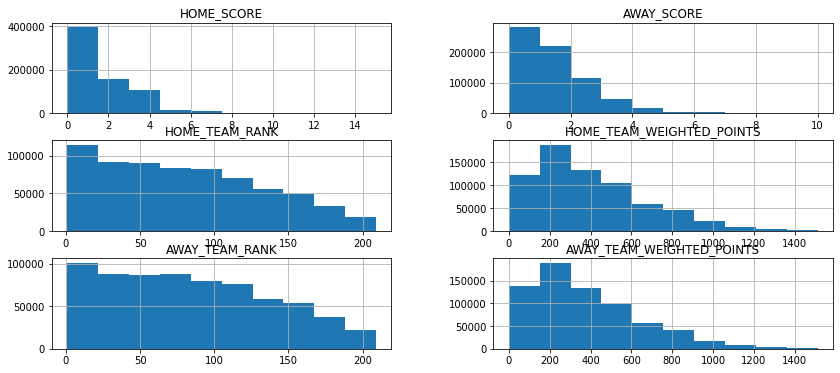

In [44]:
#we check for data distribution
merged_df.hist(bins=10, figsize=[14,6])

Our data doesnot follow the  Gaussian distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

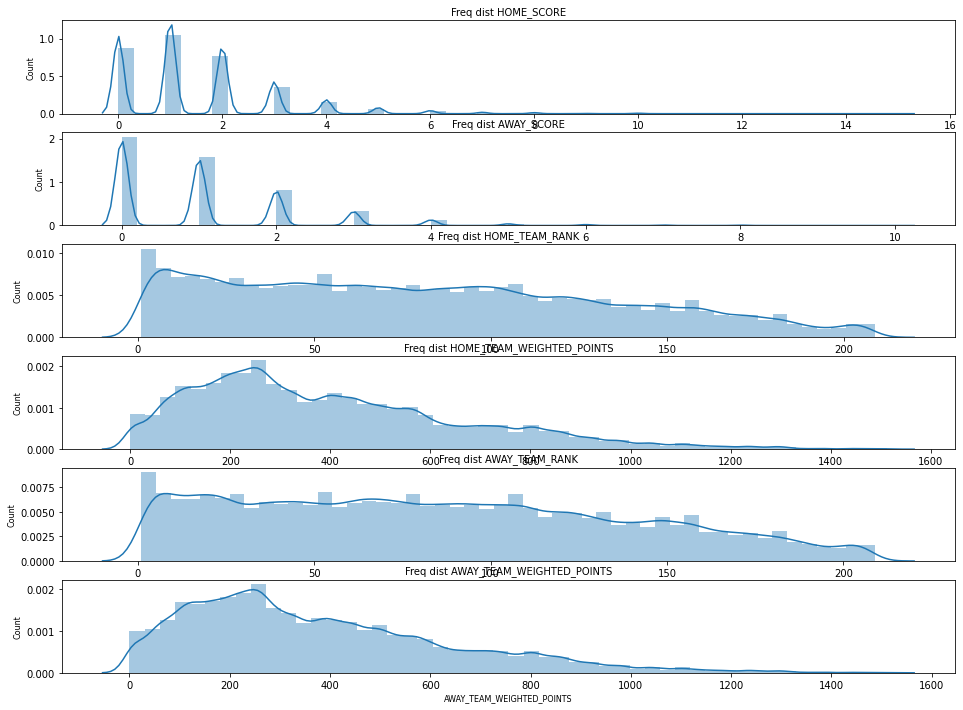

In [45]:
#univariate distribution of the numerical columns 
col_names = [
'HOME_SCORE','AWAY_SCORE','HOME_TEAM_RANK','HOME_TEAM_WEIGHTED_POINTS','AWAY_TEAM_RANK','AWAY_TEAM_WEIGHTED_POINTS']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))
for i, col_val in enumerate(col_names):

    sns.distplot(merged_df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

Numerical column values are skewed to the right indicating that most values lie in the upper range

b.**Bivariate Analysis**

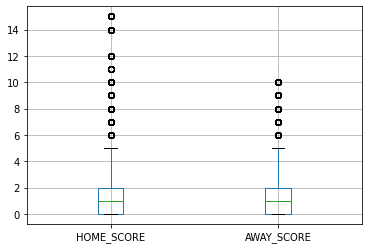

In [46]:
#Checking for outliers in the Home_score and Away_score column
boxplot = merged_df.boxplot(column=['HOME_SCORE','AWAY_SCORE'])

From the boxplots, both the home score and away score columns have outliers.
We will not drop outliers since they are very important.

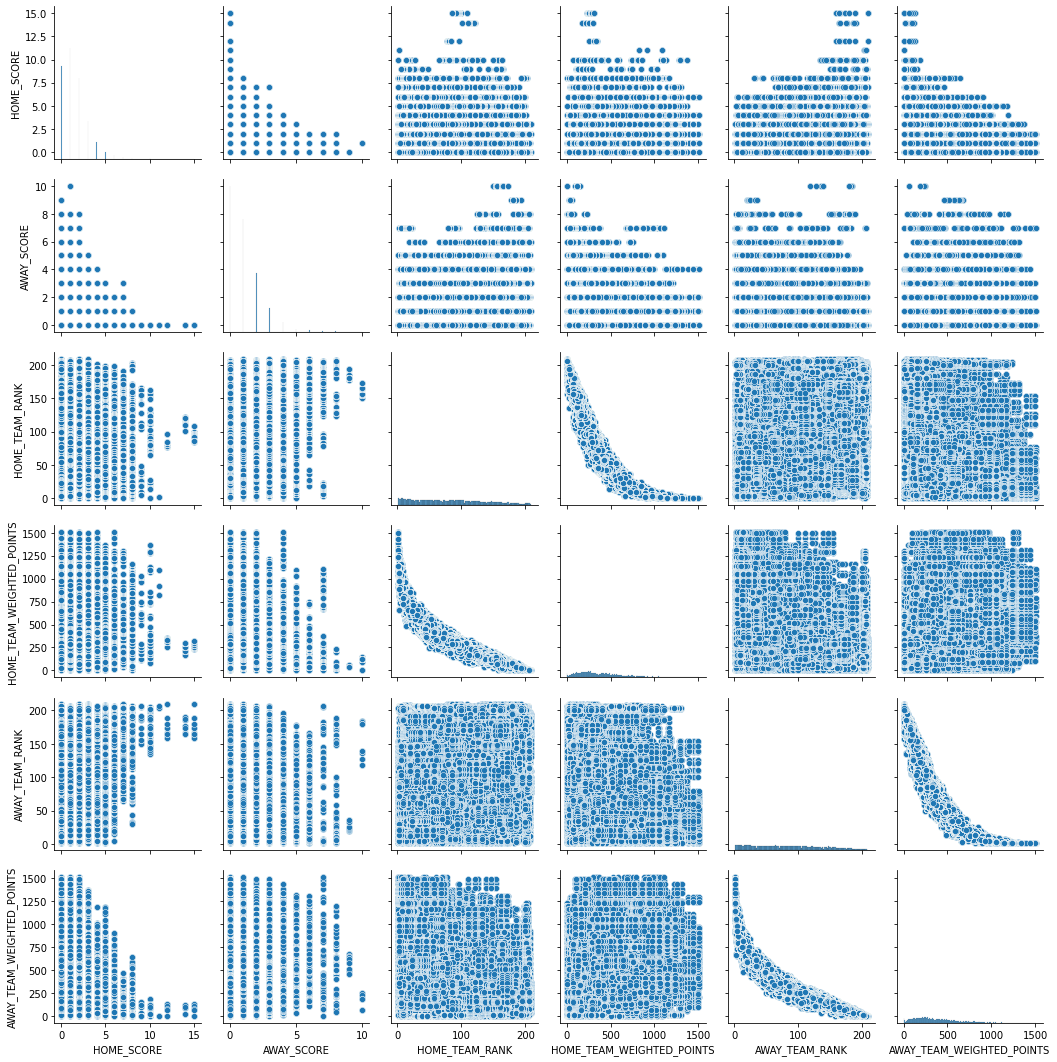

In [47]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(merged_df)
plt.show()

<Figure size 864x720 with 0 Axes>

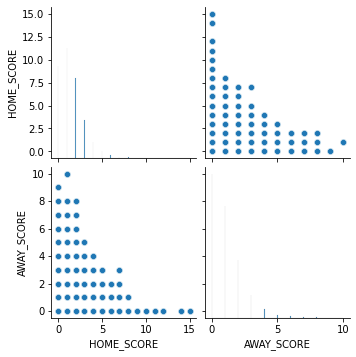

In [48]:
# Determine correlation between numeric features Home score and away score
plt.figure(figsize=(12,10))
sns.pairplot(merged_df[['HOME_SCORE', 'AWAY_SCORE']])

# 8. Feature Engineering

In [49]:
#we create a new column called Score_status which will show us if a match ended in a win , draw or lose
def d(row):
    if row['HOME_SCORE'] == row['AWAY_SCORE']:
        val = 'Draw'
    elif row['HOME_SCORE'] > row['AWAY_SCORE']:
        val = 'Win'
    else:
        val = 'Lose'
    return val

merged_df['SCORE_STATUS'] = merged_df.apply(d, axis=1)

#preview the new dataset
merged_df.head()



,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,TOURNAMENT,HOME_TEAM_RANK,HOME_TEAM_DATE,HOME_TEAM_WEIGHTED_POINTS,AWAY_TEAM_RANK,AWAY_TEAM_DATE,AWAY_TEAM_WEIGHTED_POINTS,SCORE_STATUS
0,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,100,2011-09-21,291.93,Win
1,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,92,2011-10-19,305.53,Win
2,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,95,2011-11-23,333.73,Win
3,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,93,2011-12-21,314.79,Win
4,United Arab Emirates,Qatar,3,1,Friendly,113,2011-10-19,169.00,100,2011-09-21,291.93,Win


In [50]:
#we check for unique values in new column
merged_df['SCORE_STATUS'].unique()

array(['Win', 'Draw', 'Lose'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


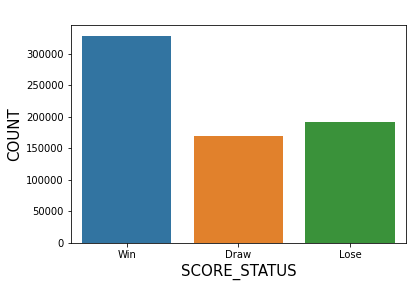

In [51]:
# visualizing the win draw and lose on a bar plot
sns.countplot('SCORE_STATUS',data = merged_df)
plt.xlabel("SCORE_STATUS",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of v",fontsize=16,color="white")
plt.show()

There is a high probabilty of wining a Fifa match

In [52]:
#we check for info
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690264 entries, 0 to 690263
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   HOME_TEAM                  690264 non-null  object        
 1   AWAY_TEAM                  690264 non-null  object        
 2   HOME_SCORE                 690264 non-null  int64         
 3   AWAY_SCORE                 690264 non-null  int64         
 4   TOURNAMENT                 690264 non-null  object        
 5   HOME_TEAM_RANK             690264 non-null  int64         
 6   HOME_TEAM_DATE             690264 non-null  datetime64[ns]
 7   HOME_TEAM_WEIGHTED_POINTS  690264 non-null  float64       
 8   AWAY_TEAM_RANK             690264 non-null  int64         
 9   AWAY_TEAM_DATE             690264 non-null  datetime64[ns]
 10  AWAY_TEAM_WEIGHTED_POINTS  690264 non-null  float64       
 11  SCORE_STATUS               690264 non-null  object  

In [53]:
#we change the score status and Tournament to categories
merged_df['TOURNAMENT'] = merged_df['TOURNAMENT'].astype('category')
merged_df['SCORE_STATUS'] = merged_df['SCORE_STATUS'].astype('category')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690264 entries, 0 to 690263
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   HOME_TEAM                  690264 non-null  object        
 1   AWAY_TEAM                  690264 non-null  object        
 2   HOME_SCORE                 690264 non-null  int64         
 3   AWAY_SCORE                 690264 non-null  int64         
 4   TOURNAMENT                 690264 non-null  category      
 5   HOME_TEAM_RANK             690264 non-null  int64         
 6   HOME_TEAM_DATE             690264 non-null  datetime64[ns]
 7   HOME_TEAM_WEIGHTED_POINTS  690264 non-null  float64       
 8   AWAY_TEAM_RANK             690264 non-null  int64         
 9   AWAY_TEAM_DATE             690264 non-null  datetime64[ns]
 10  AWAY_TEAM_WEIGHTED_POINTS  690264 non-null  float64       
 11  SCORE_STATUS               690264 non-null  category

In [54]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Status'. 
merged_df['SCORE_STATUS ']= label_encoder.fit_transform(merged_df['SCORE_STATUS']) 
  
print(merged_df['SCORE_STATUS '].unique()) 

[2 0 1]


 2:win, 1: lose and 0:Draw

In [55]:
#preview the dataset
merged_df.head()


,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,TOURNAMENT,HOME_TEAM_RANK,HOME_TEAM_DATE,HOME_TEAM_WEIGHTED_POINTS,AWAY_TEAM_RANK,AWAY_TEAM_DATE,AWAY_TEAM_WEIGHTED_POINTS,SCORE_STATUS,SCORE_STATUS
0,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,100,2011-09-21,291.93,Win,2
1,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,92,2011-10-19,305.53,Win,2
2,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,95,2011-11-23,333.73,Win,2
3,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,93,2011-12-21,314.79,Win,2
4,United Arab Emirates,Qatar,3,1,Friendly,113,2011-10-19,169.00,100,2011-09-21,291.93,Win,2


In [56]:
# Encode labels in column Toutnament 
merged_df['TOURNAMENT']= label_encoder.fit_transform(merged_df['TOURNAMENT']) 
  
print(merged_df['TOURNAMENT'].unique()) 

[22 21 10  7 32 31  0 36 18 33  6 34  8 40 35 17  3  5 19 28 26 39  9 12
 11 30 24  2  4 13 14 29 23 38 20 41  1 15 27 16 37 25]


In [57]:
#preview the dataset
merged_df

,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,TOURNAMENT,HOME_TEAM_RANK,HOME_TEAM_DATE,HOME_TEAM_WEIGHTED_POINTS,AWAY_TEAM_RANK,AWAY_TEAM_DATE,AWAY_TEAM_WEIGHTED_POINTS,SCORE_STATUS,SCORE_STATUS
0,United Arab Emirates,Qatar,3,1,22,112,2011-09-21,168.98,100,2011-09-21,291.93,Win,2
1,United Arab Emirates,Qatar,3,1,22,112,2011-09-21,168.98,92,2011-10-19,305.53,Win,2
2,United Arab Emirates,Qatar,3,1,22,112,2011-09-21,168.98,95,2011-11-23,333.73,Win,2
3,United Arab Emirates,Qatar,3,1,22,112,2011-09-21,168.98,93,2011-12-21,314.79,Win,2
4,United Arab Emirates,Qatar,3,1,22,113,2011-10-19,169.00,100,2011-09-21,291.93,Win,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
690259,Togo,Gambia,1,1,7,125,2018-06-07,165.65,163,2018-02-15,99.55,Draw,0
690260,Togo,Gambia,1,1,7,125,2018-06-07,165.65,164,2018-03-15,99.55,Draw,0
690261,Togo,Gambia,1,1,7,125,2018-06-07,165.65,175,2018-04-12,70.98,Draw,0
690262,Togo,Gambia,1,1,7,125,2018-06-07,165.65,175,2018-05-17,70.98,Draw,0


# 9. Implementing the solution

**Checking for Multi_collinearlity**

In [58]:
# Let's display the correlations between the variables
corr = merged_df[['HOME_SCORE','AWAY_SCORE','HOME_TEAM_RANK','AWAY_TEAM_RANK','HOME_TEAM_WEIGHTED_POINTS','AWAY_TEAM_WEIGHTED_POINTS']].corr()
corr

,HOME_SCORE,AWAY_SCORE,HOME_TEAM_RANK,AWAY_TEAM_RANK,HOME_TEAM_WEIGHTED_POINTS,AWAY_TEAM_WEIGHTED_POINTS
HOME_SCORE,1.000000,-0.158281,-0.156901,0.274717,0.166419,-0.231882
AWAY_SCORE,-0.158281,1.000000,0.194509,-0.212452,-0.158606,0.229854
HOME_TEAM_RANK,-0.156901,0.194509,1.000000,0.501955,-0.906084,-0.454748
AWAY_TEAM_RANK,0.274717,-0.212452,0.501955,1.000000,-0.465530,-0.909698
HOME_TEAM_WEIGHTED_POINTS,0.166419,-0.158606,-0.906084,-0.465530,1.000000,0.448711
AWAY_TEAM_WEIGHTED_POINTS,-0.231882,0.229854,-0.454748,-0.909698,0.448711,1.000000


The table above assist us to know how variables are related to one another.The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. 
We use these correlations to compute the VIF(Variance Inflation Factor) score for each variable and create a new dataframe with the inverse of the matrix above.

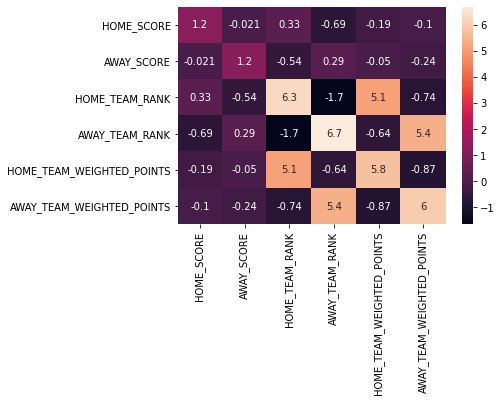

In [59]:
#computing the VIF(which is the inverse of the correlation matrix)
VIF_df = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)
sns.heatmap(VIF_df, annot = True)
plt.show()

The heat map above shows VIF values that are very close to 0 meaning that there is very little multi-collinearity


#10. Regression

We will use Polynomial Regression and logistic Regression for this study. For polynomial approach we will use two models:

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

We will separate our merged_df into two to prepare it for modelling using both models

a. **Approach 1: Polynomial Regression**

**Model 1 : Predicting the Home Score**

In [60]:
#Import libaries
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn import metrics

In [61]:
merged_df.head()

,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,TOURNAMENT,HOME_TEAM_RANK,HOME_TEAM_DATE,HOME_TEAM_WEIGHTED_POINTS,AWAY_TEAM_RANK,AWAY_TEAM_DATE,AWAY_TEAM_WEIGHTED_POINTS,SCORE_STATUS,SCORE_STATUS
0,United Arab Emirates,Qatar,3,1,22,112,2011-09-21,168.98,100,2011-09-21,291.93,Win,2
1,United Arab Emirates,Qatar,3,1,22,112,2011-09-21,168.98,92,2011-10-19,305.53,Win,2
2,United Arab Emirates,Qatar,3,1,22,112,2011-09-21,168.98,95,2011-11-23,333.73,Win,2
3,United Arab Emirates,Qatar,3,1,22,112,2011-09-21,168.98,93,2011-12-21,314.79,Win,2
4,United Arab Emirates,Qatar,3,1,22,113,2011-10-19,169.00,100,2011-09-21,291.93,Win,2


In [62]:
#we define X and y using the column locations
X = merged_df[['HOME_TEAM','HOME_TEAM_RANK','AWAY_TEAM', 'AWAY_SCORE', 'AWAY_TEAM_RANK']]
y = merged_df['HOME_SCORE']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
regressor= LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_pred = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix

# Let's describe our residual:
pd.DataFrame(residuals).describe()
print("The RMSE score for the model is : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("The residual mean score for the model is: ", residuals.mean())

The RMSE score for the model is :  1.2059121390985937e-14
The residual mean score for the model is:  1.637811341278824e-16


The lower the RMSE of a model, the better the performance of the model. Therefore, this model is fairly good in making predictions

**We carry out Hyperparameter tuning to find the optimal parameters for the model**


In [63]:
#import the libraries
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
import scipy as sp
from sklearn.model_selection import KFold

In [64]:
# Tuning the parameters of the linear regression model to find the optimal 

# Printing the Linear Regression model parameters that can be tuned
#
from sklearn.linear_model import LinearRegression
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
# The parameters that can be tuned are fitting the intercept and normalizing
# Creating a parameters dictionary
#
params = {'normalize': [True, False],
         'fit_intercept': [True, False]}

# Creating a cross validation of 5 folds
#
kfold = KFold(n_splits = 5)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=regressor, param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {grid_search.best_score_} and the best parameters are {grid_search.best_params_}')

Best score is -1.905769623263691e-13 and the best parameters are {'fit_intercept': False, 'normalize': True}



**We perform cross validation to check for overfitting or underfitting**


In [66]:
# Performing cross validation of 5 folds
#
scores = cross_val_score(regressor, X, y, scoring = 'neg_mean_squared_error', cv = 5)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {np.round(scores.mean()*-1, 3)}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 0.0
Standard deviation of the cross validation scores is 0.0



**we check the appripriateness of the model using a residual plot**

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

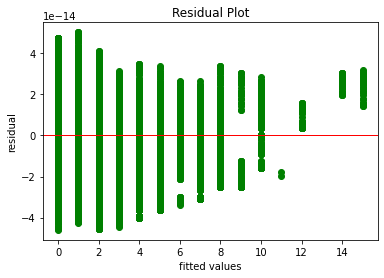

In [67]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='green')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [68]:

# Performing the barlett's test
#
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Calculating the critical value of the chi squared distribution, to compare it with the test_result
#
degrees_of_freedom = len(y_pred) - 1
probability =  1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degrees_of_freedom)

# If the test_result is greater than the critical value, then the null hypothesis is
# rejected. This means that there are patterns to the variance of the data

# Otherwise, if no patterns are identified, null hypothesis is accepted. This means that 
# the variance is homogeneous across the dataset

if (test_result > critical_value):
  print(f'The test result of {np.round(test_result,2)} is greater than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are unequal, which means that the model should be reassessed')
  print('The variances are heterogenous')
else:
  print(f'The test result of {np.round(test_result,2)} is less than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are equal, which means that the model is okey. No need to reasses')
  print('The variances are homogeneous')

The test result of 8769958.2 is less than the critical value of inf
Thefore the variances are equal, which means that the model is okey. No need to reasses
The variances are homogeneous


**Model 2:Predicting the Away Score**

In [69]:
#we define X and y using the column locations
X = merged_df[['HOME_TEAM','HOME_SCORE', 'HOME_TEAM_RANK','AWAY_TEAM', 'AWAY_TEAM_RANK']]
y = merged_df['AWAY_SCORE']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
regressor= LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_pred = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix

# Let's describe our residual:
pd.DataFrame(residuals).describe()
print("The RMSE score for the model is : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("The residual mean score for the model is: ", residuals.mean())

The RMSE score for the model is :  2.7794968436017968e-14
The residual mean score for the model is:  -1.5987054329295408e-16


**We carry out Hyperparameter tuning to find the optimal parameters for the model**

In [70]:
# Tuning the parameters of the linear regression model to find the optimal 

# Printing the Linear Regression model parameters that can be tuned
#
from sklearn.linear_model import LinearRegression
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
# The parameters that can be tuned are fitting the intercept and normalizing
# Creating a parameters dictionary
#
params = {'normalize': [True, False],
         'fit_intercept': [True, False]}

# Creating a cross validation of 5 folds
#
kfold = KFold(n_splits = 5)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=regressor, param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {grid_search.best_score_} and the best parameters are {grid_search.best_params_}')

Best score is -3.3345425419287556e-14 and the best parameters are {'fit_intercept': False, 'normalize': True}


**we perform cross validation to check for overfitting or underfitting**

In [72]:
# Performing cross validation of 5 folds
#
scores = cross_val_score(regressor, X, y, scoring = 'neg_mean_squared_error', cv = 5)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {np.round(scores.mean()*-1, 3)}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 0.0
Standard deviation of the cross validation scores is 0.0


**we check the appropriateness of the model**

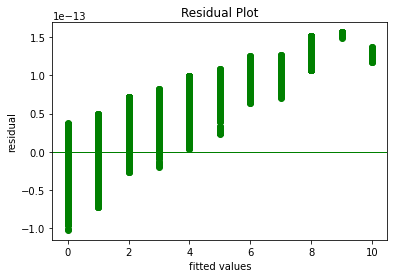

In [73]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='green')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='green', linewidth=1)
plt.show()

In [74]:

# Performing the barlett's test
#
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Calculating the critical value of the chi squared distribution, to compare it with the test_result
#
degrees_of_freedom = len(y_pred) - 1
probability =  1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degrees_of_freedom)

# If the test_result is greater than the critical value, then the null hypothesis is
# rejected. This means that there are patterns to the variance of the data

# Otherwise, if no patterns are identified, null hypothesis is accepted. This means that 
# the variance is homogeneous across the dataset

if (test_result > critical_value):
  print(f'The test result of {np.round(test_result,2)} is greater than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are unequal, which means that the model should be reassessed')
  print('The variances are heterogenous')
else:
  print(f'The test result of {np.round(test_result,2)} is less than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are equal, which means that the model is okey. No need to reasses')
  print('The variances are homogeneous')

The test result of 8481624.13 is less than the critical value of inf
Thefore the variances are equal, which means that the model is okey. No need to reasses
The variances are homogeneous


**Model 2: Logistic Regression**

In [75]:

# Selecting the relevant features for the logistic regression model
#
football_data = merged_df[['HOME_TEAM',	'AWAY_TEAM',	'HOME_SCORE',	'AWAY_SCORE',	'TOURNAMENT', 'HOME_TEAM_RANK', 'AWAY_TEAM_RANK', 'SCORE_STATUS']]

# Previewing the first five records of the data
#
football_data.head()

,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,TOURNAMENT,HOME_TEAM_RANK,AWAY_TEAM_RANK,SCORE_STATUS
0,United Arab Emirates,Qatar,3,1,22,112,100,Win
1,United Arab Emirates,Qatar,3,1,22,112,92,Win
2,United Arab Emirates,Qatar,3,1,22,112,95,Win
3,United Arab Emirates,Qatar,3,1,22,112,93,Win
4,United Arab Emirates,Qatar,3,1,22,113,100,Win


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


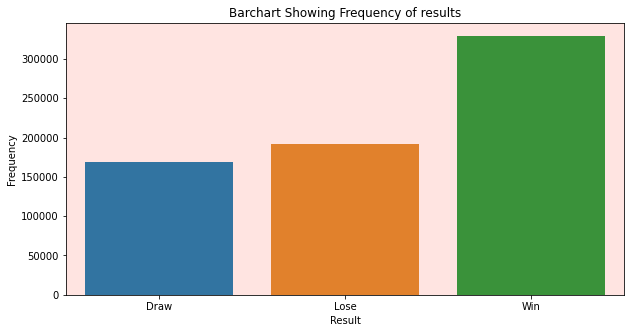

In [76]:
# we check if the data is well balanced between all the results; win draw or lose
#
plt.figure(figsize = (10, 5))
ax = sns.countplot(football_data.SCORE_STATUS)
ax.set_facecolor('mistyrose')
plt.ylabel('Frequency')
plt.xlabel('Result')
plt.title('Barchart Showing Frequency of results')
plt.show()

We see from the chart that results are fairly distributed

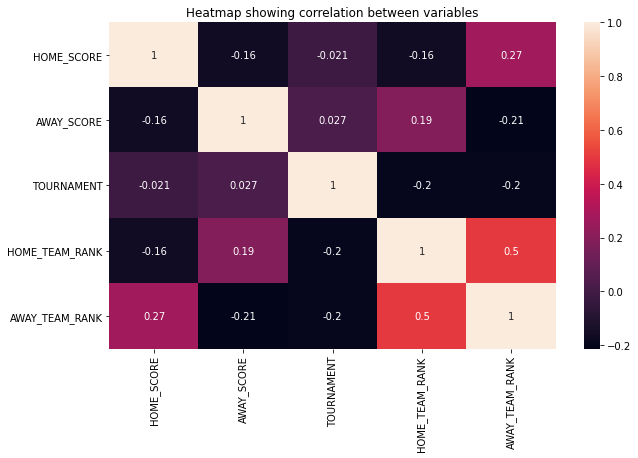

In [77]:
# Checking for correlations between features
#
plt.figure(figsize = (10, 6))
sns.heatmap(football_data.corr(), annot = True) 
plt.title('Heatmap showing correlation between variables')
plt.show()

we create a Logistic Regression Model

In [86]:
  football_data

,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,TOURNAMENT,HOME_TEAM_RANK,AWAY_TEAM_RANK,SCORE_STATUS
0,United Arab Emirates,Qatar,3,1,22,112,100,Win
1,United Arab Emirates,Qatar,3,1,22,112,92,Win
2,United Arab Emirates,Qatar,3,1,22,112,95,Win
3,United Arab Emirates,Qatar,3,1,22,112,93,Win
4,United Arab Emirates,Qatar,3,1,22,113,100,Win
...,...,...,...,...,...,...,...,...
690259,Togo,Gambia,1,1,7,125,163,Draw
690260,Togo,Gambia,1,1,7,125,164,Draw
690261,Togo,Gambia,1,1,7,125,175,Draw
690262,Togo,Gambia,1,1,7,125,175,Draw


In [96]:
# Splitting the data into features and the target variable
#
from sklearn.linear_model import LogisticRegression
X = football_data.drop(columns={'SCORE_STATUS' ,'AWAY_TEAM', 'HOME_TEAM'}, axis=1)
y = football_data.SCORE_STATUS

# Encoding the categorical features
#
#X = pd.get_dummies(X, drop_first=True)

# Spliting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Instantiating the model and training the model
#
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Making predictions
#
y_pred = logistic.predict(X_test)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array(['Lose', 'Draw', 'Win', ..., 'Win', 'Win', 'Draw'], dtype=object)

In [97]:
# Measuring the accuracy of the model
#
print(f'The accuracy of the model is {accuracy_score(y_test, y_pred)}')

The accuracy of the model is 1.0


In [98]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[42574,     0,     0],
       [    0, 47845,     0],
       [    0,     0, 82147]])

The model above has an accuracy of approximately 100% The model is clearly overfitting on the training data; further investigation and assessment is needed

**Hyperparameter tuning**

In [100]:
# Displaying parameters of the logistic regression model that can be tuned
#
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
# Creating a dictionary of parameters to be tuned
#
params = {'C': [1.0, 5.0],
         'penalty': ['l1', 'l2']}

logistic = LogisticRegression()

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=logistic, param_grid = params, cv = kfold, scoring = 'accuracy')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {grid_search.best_score_} and the best parameters are {grid_search.best_params_}')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

Best score is 1.0 and the best parameters are {'C': 1.0, 'penalty': 'l2'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# 11. Challenging the Solution

Based on the Predictive analysis further investigation and assessment is needed on all the models 

#12. Follow up questions 


a). Did we have the right data?

b). Do we need other data to answer our question?

c). Did we have the right question?

#13.Recommendation

At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.